## PRiAD 3 

# Wizualizacja danych


## 1. Pakiety służące do wizualizacji danych

Do najpopularniejszych pakietów wykorzystywanych w wizualizacji danych należą pakiety [`matplotlib`](https://matplotlib.org/) oraz pakiet [`seaborn`](https://seaborn.pydata.org/). Pakiety te, wraz z wcześniej poznanymi pakietami [`numpy`](https://numpy.org/), [`pandas`](https://pandas.pydata.org/) oraz [`scikit image`](https://scikit-image.org/) będa wykorzystywane w niniejszym ćwiczeniu:

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram
#matplotlib inline

## 2. Podstawowe wykresy grafiki prezentacyjnej

**Wykres liniowy** pokazuje serie danych w postaci linii łączacej kolejne punkty danych. Zakłada się przy tym, że współrzędne 'x' kolejnych punktów są uporządkowane rosnąco. W najcześciej występującym wariancie wykresu liniowego na osi odciętych ('x') znajdując się kolejne chwile czasowe, zaś na osi rzędnych znajdują się kolejne wartości pomiarowe (punkty danych, wartości atrybutu) zarejestrowane w tych chwilach czasowych.  Przykład poniższy pokazuje wykres wartości losowych pewnego szeregu czasowego. Funkcja 'cumsum' wyznacza sumę skumulowana wartości losowych. Do wyświetlenia wykorzystywana jest metoda 'plot' obiektu klasy 'Series' pakietu `pandas`. Pomimo, iż jest to metoda obiektu tego pakietu, to w istocie jej działanie polega na wywołaniu odpowiedniej metody znajdującej się w pakiecie 'matplotlib'. 

2021-11-06 00:00:00   -1.034519
2021-11-06 00:00:01    1.301750
2021-11-06 00:00:02   -0.854859
2021-11-06 00:00:03   -0.916967
2021-11-06 00:00:04   -0.195720
                         ...   
2021-11-06 00:01:35   -1.736951
2021-11-06 00:01:36   -1.381233
2021-11-06 00:01:37   -0.167248
2021-11-06 00:01:38    0.323368
2021-11-06 00:01:39    1.347461
Freq: s, Length: 100, dtype: float64
2021-11-06 00:00:00    -1.034519
2021-11-06 00:00:01     0.267232
2021-11-06 00:00:02    -0.587628
2021-11-06 00:00:03    -1.504595
2021-11-06 00:00:04    -1.700315
                         ...    
2021-11-06 00:01:35   -13.174341
2021-11-06 00:01:36   -14.555574
2021-11-06 00:01:37   -14.722823
2021-11-06 00:01:38   -14.399455
2021-11-06 00:01:39   -13.051993
Freq: s, Length: 100, dtype: float64


<Axes: >

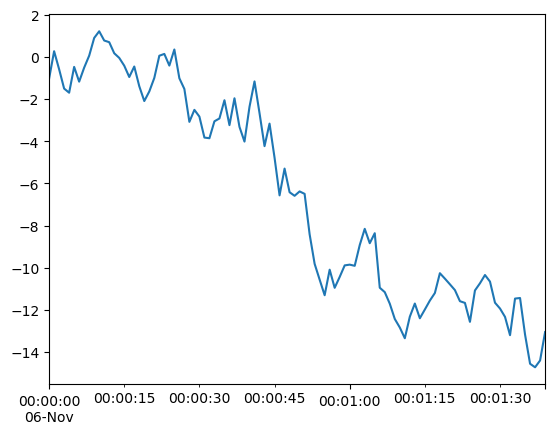

In [2]:
ts = pd.Series(np.random.randn(100),index=pd.date_range('2021-11-06', periods=100, freq = 's'))
print(ts)

### ts = ts.cumsum() - Каждое значение становится суммой всех предыдущих + текущего
### проще говоря, текущее = текущее + прошлое, прошедшее то же самое

ts = ts.cumsum()
print(ts)

"""
ts.plot() - Строит график временного ряда

По оси X → даты (DatetimeIndex) ИНДЕКСЫ!!

По оси Y → значения ts
"""

ts.plot()


Rysunek pokazany powyżej nie wypełnia całego dostępnego miejsca w oknie widoku. W celu uzyskania większego wykresu określić jego rozdzielczość opprzez zastosowanie jednej z funkcji formatujących pole wyświetlania rysunku z pakiety `matplotlib`.

<Axes: >

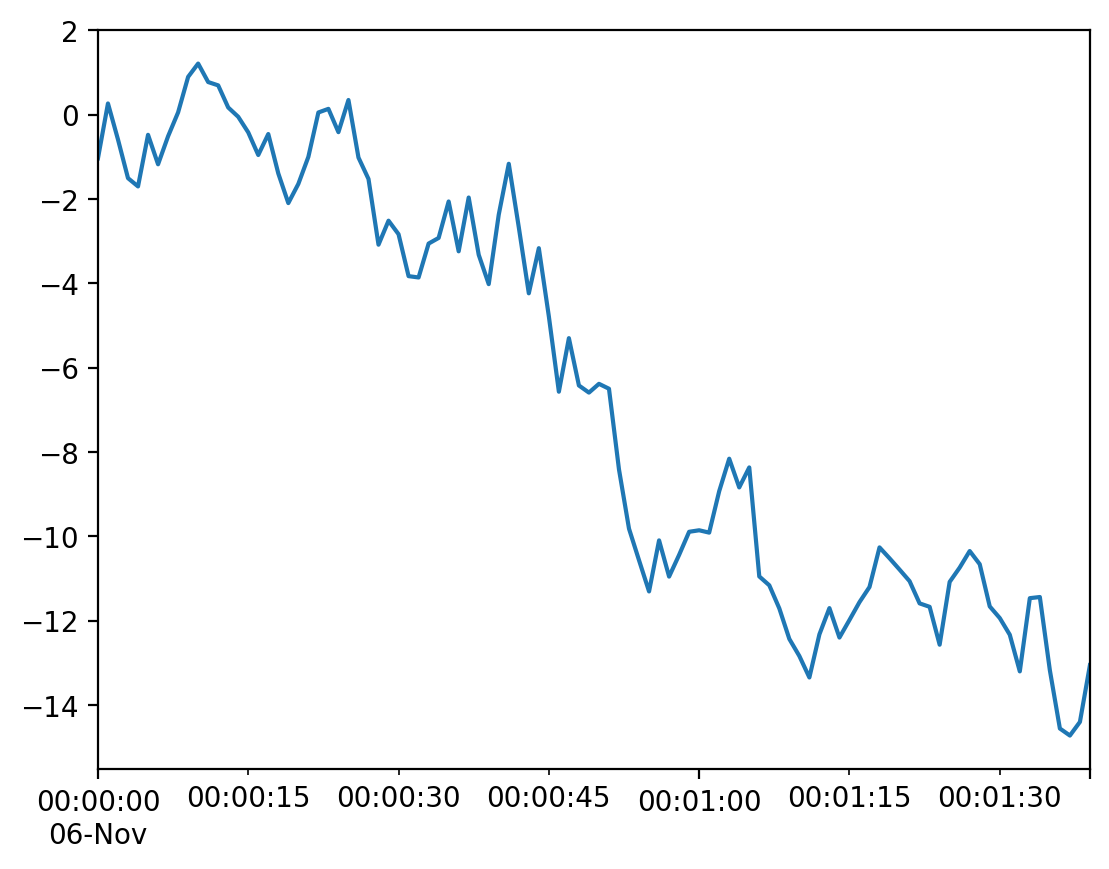

In [3]:
# określamy rozdzielczość wykresu
"""
plt.figure(dpi = 200) - увелчивает размер графика. Был маленький стал огромный
"""
plt.figure(dpi = 200)
ts.plot()

Parametr rozdzielczości może być także zdefiniowany globalnie. W tym przypadku jego ustawienie pozostaje w mocy także dla kolejnych wykresów.

2019-04-01   -0.111673
2019-04-02    1.716126
2019-04-03   -0.190125
2019-04-04    0.013729
2019-04-05    0.558387
Freq: D, dtype: float64
2019-04-01   -0.111673
2019-04-02    1.604453
2019-04-03    1.414328
2019-04-04    1.428057
2019-04-05    1.986444
Freq: D, dtype: float64


<Axes: >

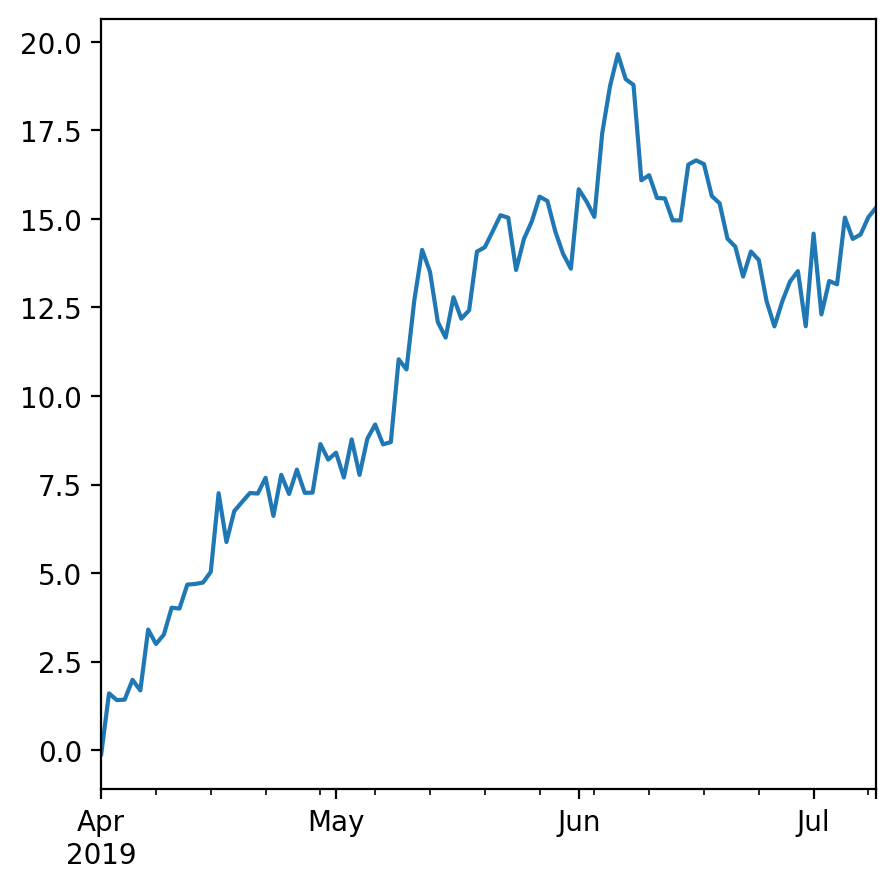

In [5]:
"""
plt.rcParams['figure.figsize'] = [5, 5] - задаёт фиксированные стороны картинки, но вывод зависит от ДПИ
"""

plt.rcParams['figure.figsize'] = [5, 5]
ts = pd.Series(np.random.randn(100),index=pd.date_range('2019-04-01', periods=100))
plt.figure(dpi = 200)
print(ts.head())
ts = ts.cumsum()
print(ts.head())
ts.plot()


Podobnie do wizualizacji szeregu czasowego przebiega wizualizacja danych znajdujących się w ramce danych. W tym przypadku na wykresie są wyświetlane wykresy pokazujące wartości wszystkich atrybutów. Automatycznie dodawana jest przy tym legenda, prezentująca kolory linii przypisane kolejnym artybutom.

                   A         B         C         D
2019-04-01 -1.577043  0.925605  0.579359 -0.876977
2019-04-02  0.082718 -0.268868  1.572141  0.350758
2019-04-03 -0.917156 -0.312357  1.066272 -0.019587
2019-04-04 -1.649241  0.146976 -0.052616  1.457928
2019-04-05 -0.003715 -0.315777  1.223441 -1.349196
                   A         B         C         D
2019-04-01 -1.577043  0.925605  0.579359 -0.876977
2019-04-02 -1.494325  0.656738  2.151500 -0.526219
2019-04-03 -2.411481  0.344381  3.217772 -0.545806
2019-04-04 -4.060722  0.491357  3.165156  0.912122
2019-04-05 -4.064437  0.175580  4.388598 -0.437075


<Figure size 500x500 with 0 Axes>

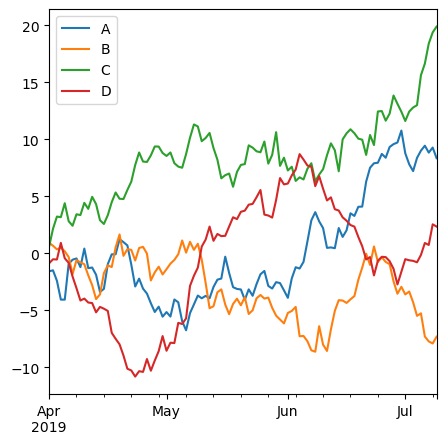

In [7]:
"""
График строится по столбцам для рамки данных
"""


df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list('ABCD'))
print(df.head())
df = df.cumsum()
print(df.head())
plt.figure();
df.plot();

Kolejny przykład pokazuje analogiczny wykres dla rzeczywistych danych - kursów walut znajdujacych się w pliku 'waluty1.xls'. W oryginalnym pliku danych próbki są kolejno numerowane, zaś data jest zapisana w postaci trzech atrybutów (dzień, miesiąc, rok). Dla poprawnego wyświetlenie tych danych konieczna jest wobec tego konwersja polegająca na utworzeniu na podstawie tych trzech atrybutów indeksu ramki danych w postaci zakresu chwil czasowych.

    rok  mies  dzien     CHF     USD     EUR     JPY
0  2010    10      5  2.9809  2.8838  3.9742  3.4617
1  2010    10      4  2.9614  2.8922  3.9577  3.4764
2  2010    10      1  2.9376  2.8772  3.9465  3.4535
3  2010     9     30  2.9955  2.9250  3.9870  3.5129
4  2010     9     29  2.9925  2.9227  3.9710  3.4933
               CHF     USD     EUR     JPY
2010-10-05  2.9809  2.8838  3.9742  3.4617
2010-10-04  2.9614  2.8922  3.9577  3.4764
2010-10-01  2.9376  2.8772  3.9465  3.4535
2010-09-30  2.9955  2.9250  3.9870  3.5129
2010-09-29  2.9925  2.9227  3.9710  3.4933


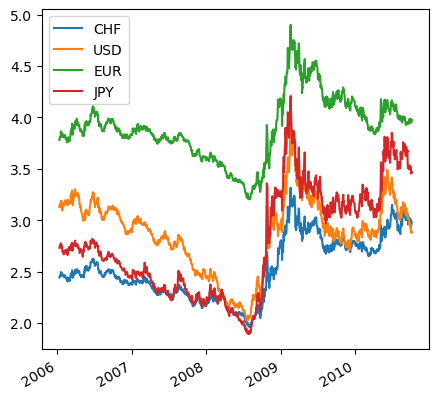

In [11]:
w = pd.read_excel(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\waluty1.xls")
print(w.head())


###Так мы задаём индекс используя три колонки год, месяц, день
w.index = pd.to_datetime(w['rok'].map(str) + "-" + w['mies'].map(str) + "-" + w['dzien'].map(str))
###

### Убираем нунужные колонки
w = w.drop(columns=['rok','dzien','mies'])
###

#print("\n",w.head())
w.plot()
print(w.head())

> **Zadanie** Wyświetl identyczny wykres, ale średnich kursów miesięcznych (wskazówka - użyj metody `groupby`) 

    rok  mies  dzien     CHF     USD     EUR     JPY
0  2010    10      5  2.9809  2.8838  3.9742  3.4617
1  2010    10      4  2.9614  2.8922  3.9577  3.4764
2  2010    10      1  2.9376  2.8772  3.9465  3.4535
3  2010     9     30  2.9955  2.9250  3.9870  3.5129
4  2010     9     29  2.9925  2.9227  3.9710  3.4933
               CHF     USD     EUR     JPY rok_mies
2010-10-05  2.9809  2.8838  3.9742  3.4617  2010-10
2010-10-04  2.9614  2.8922  3.9577  3.4764  2010-10
2010-10-01  2.9376  2.8772  3.9465  3.4535  2010-10
2010-09-30  2.9955  2.9250  3.9870  3.5129  2010-09
2010-09-29  2.9925  2.9227  3.9710  3.4933  2010-09
...            ...     ...     ...     ...      ...
2006-01-17  2.4618  3.1521  3.8146  2.7401  2006-01
2006-01-16  2.4567  3.1321  3.8062  2.7336  2006-01
2006-01-13  2.4607  3.1542  3.8085  2.7563  2006-01
2006-01-12  2.4489  3.1229  3.7933  2.7420  2006-01
2006-01-11  2.4420  3.1353  3.7793  2.7326  2006-01

[1200 rows x 5 columns]
               CHF       USD     

<Axes: xlabel='rok_mies'>

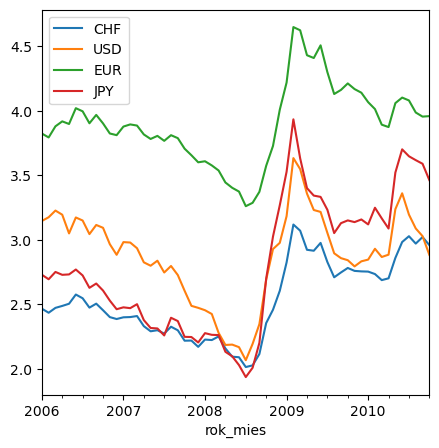

In [33]:
# rozwiązanie zadania
df = pd.read_excel(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\waluty1.xls")
print(df.head())

df.index = pd.to_datetime(df['rok'].map(str) + "-" + df['mies'].map(str) + "-" + df['dzien'].map(str))

### Убираем ненужные колонки года, месяца и дня
df = df.drop(columns = ['rok', 'mies', 'dzien'])
###

### Создаём новую колонку "rok_mies" со значения индекса, сокращенного до месяца
df['rok_mies'] = df.index.to_period('M')
print(df)
###

### Группируем по колонке rok_mies и она становится новым индексом
df = df.groupby('rok_mies').mean()
print(df)
print(df.index)
###

df.plot()

> **Zadanie** wyświetl podobny wykres dla danych zawartych w pliku 'kursy.xlsx'

{'WIG30':                Unnamed: 0 kurs WIG30 Unnamed: 2 Unnamed: 3  Unnamed: 4  \
0                     NaN        NaN        NaN        NaN         NaN   
1                    Data   Otwarcie  Najwyzszy  Najnizszy  Zamkniecie   
2     1991-04-16 00:00:00      98.65      98.65      98.65       98.65   
3     1991-04-23 00:00:00      94.41      94.41      94.41       94.41   
4     1991-04-30 00:00:00      92.24      92.24      92.24       92.24   
...                   ...        ...        ...        ...         ...   
6770  2020-02-28 00:00:00       2081    2100.02    2015.93     2050.16   
6771  2020-03-02 00:00:00    2114.15    2132.64    2048.51     2089.22   
6772  2020-03-03 00:00:00    2123.32    2198.23    2115.26     2180.15   
6773  2020-03-04 00:00:00     2162.8     2185.7    2149.49      2149.6   
6774  2020-03-05 00:00:00    2180.91    2185.72     2110.3     2112.25   

     Unnamed: 5  
0           NaN  
1       Wolumen  
2           325  
3          5905  
4          

<Axes: xlabel='Data'>

<Figure size 10000x10000 with 0 Axes>

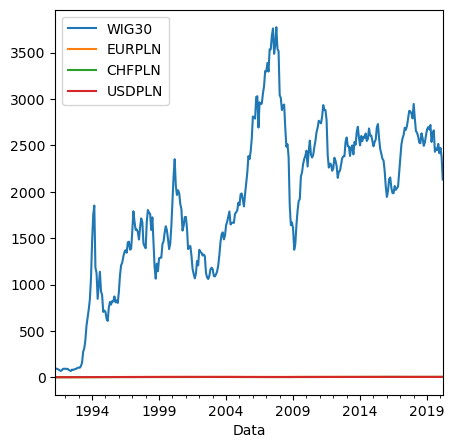

In [67]:
# rozwiązanie zadania
df_dict = pd.read_excel(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\kursy.xlsx", sheet_name=None)
print(df_dict)

result_df = pd.DataFrame()

for sheet_name, df in df_dict.items():
    ### Вторая линия становится названиями колонок
    df.columns = df.iloc[1]
    ###

    ### начинаем считать с третьей линии и сбрасываем индексы, теперь они считаются с нуля
    df_clean = df.iloc[2:].reset_index(drop = True)
    ###

    ### Создаём колонку дата и курс в момент закрытия
    df_clean['Data'] = pd.to_datetime(df_clean['Data'])
    df_clean['Zamkniecie'] = pd.to_numeric(df_clean['Zamkniecie'])
    ###

    ### Буферный рамка
    temp_df = pd.DataFrame({
        'Data': df_clean['Data'],
        sheet_name: df_clean['Zamkniecie']
    })
    
    if result_df.empty:
        result_df = temp_df
    else:
        # Объединяем по дате, а не просто присваиваем
        result_df = pd.merge(result_df, temp_df, on='Data', how='outer')
    ###

### Теперь колонка ДАТА - индексы
result_df.index = result_df['Data']
result_df = result_df.drop(columns = ['Data'])
###


### Группируем индексы по месяцам и считаем среднее значение для сгруппированных
result_df = result_df.groupby(result_df.index.to_period('M')).mean()
###

print(result_df)
plt.figure(dpi = 2000)
result_df.plot()

Innym popularnym rodzajem wykresu jest **wykres kolumnowy**, w którym wartości kolejnych danych są wyświetlane w postaci pionowego słupka. W poniższym przykładzie wykres słupkowy jest rysowany dla obiektu danych o indeksie 5 - wysokość kolejnych słupków odpowiada wartościom kolejnych atrybutów tego obiektu. 

                   A         B         C         D
2019-04-01 -0.416683 -0.417147 -0.964874  0.771612
2019-04-02  0.450331  0.601860 -0.703057 -0.235947
2019-04-03  0.911679  0.358824 -0.863001  0.245209
2019-04-04  2.178455  1.318400 -3.627068 -0.772067
2019-04-05  4.068810  3.627769 -3.046093 -1.151467
2019-04-06  5.228650  2.401392 -2.639730 -1.087765


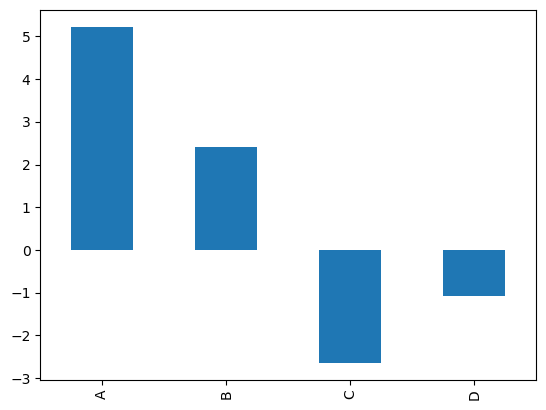

In [9]:

print(df.head(6))
plt.figure();
df.iloc[5].plot(kind='bar');

Standardowo etykiety osi x są odwrócone o 90 stopni. W celu uzyskania ich właściwej orientacji należy użyć argumentu `rot`

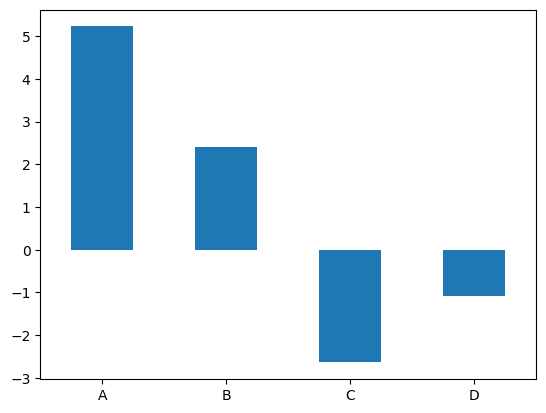

In [10]:
plt.figure();
df.iloc[5].plot(kind='bar',rot=0);

Zmiana typu wykresu na `barh` pozwala na uzyskanie **wykresu słupkowego**, czyli takieg, w którym prostokąty pokazujące kolejne wartości są zorientowane poziomo. 

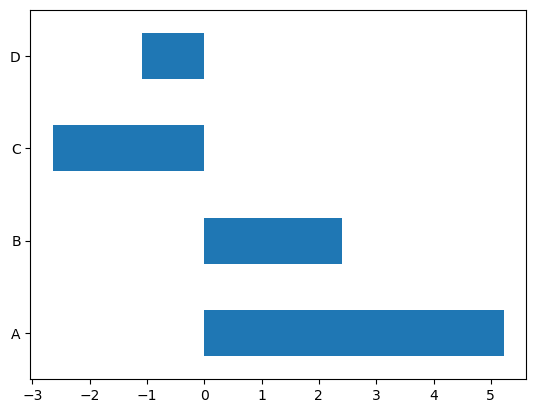

In [11]:
plt.figure();
df.iloc[5].plot(kind='barh',rot=0);

> **Zadanie** Wyświetl wykres słupkowy pokazujący liczbę ludności wszystkich dużych państw świata tj. liczących więcej niż 35 milionów mieszkańców od najmniejszego do największego (wskazówka - wykonaj kolejno: utworzenie nowej ramki danych zawierającej państwa duże, sortowanie tej ramki względem liczby ludności, wyświetlenie wykresu). Dla ułatwienia, pierwsza część kodu jest już gotowa.

             Population  Land Area
Country                           
Afghanistan    38928346     652.86
Albania         2877797       27.4
Algeria        43851044  2,381,740
Andorra           77265        470
Angola         32866272  1,246,700

               Ludnosc Powierzchnia
Kraj                              
Afghanistan  38928346       652.86
Albania       2877797         27.4
Algeria      43851044    2,381,740
Andorra         77265          470
Angola       32866272    1,246,700
                                     Ludnosc Powierzchnia
Kraj                                                     
Morocco                             36910560        446.3
Canada                              37742154    9,093,510
Poland                              37846611       306.23
Afghanistan                         38928346       652.86
Iraq                                40222493       434.32
Ukraine                             43733762       579.32
Sudan                               43849260

<Axes: ylabel='Kraj'>

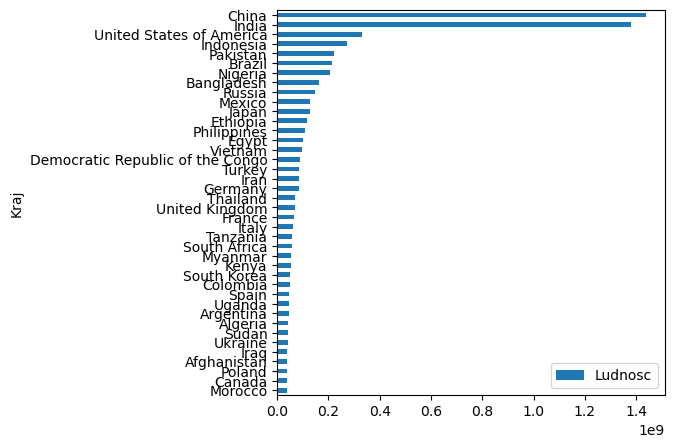

In [85]:
# wczytanie i transformacja danych 
panstwa = pd.read_excel(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\alphabetical-list-of-countries2020.xlsx",header = 4,usecols = range(2,5), index_col = 0)
print(panstwa.head())

### Переименовали колонки
panstwa.columns = ['Ludnosc','Powierzchnia']
###

panstwa.index.name = 'Kraj'
print("\n", panstwa.head())
# rozwiązanie zadania

panstwa2 = panstwa[panstwa['Ludnosc'] > 35_000_000].sort_values('Ludnosc')
print(panstwa2)

panstwa2.plot(kind = 'barh', rot = 0)


Dla ramek danych o większej liczbie kolumn, bez ograniczania zakresu do jedynie wybranych, wykres kolumnowy zawiera kolumny przyporządkowane poszczególnym atrybutom (kolumnom ramki danych).

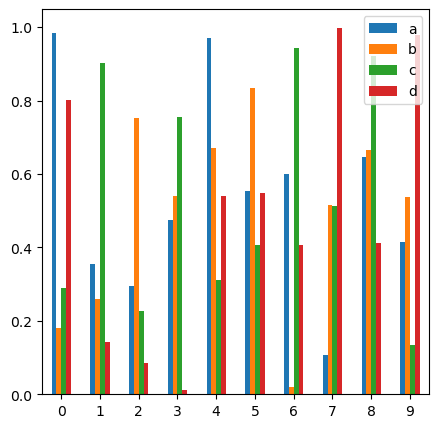

In [96]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar(rot=0);
#df2.iloc[2].plot.bar(rot=0);


> **Zadanie** Wyswietl wykres kolumnowy przedstawiający średnie kursy czterech walut w każdym roku na  podstawie kursów dziennych zawartych w pliku `waluty1.xls`

    rok  mies  dzien     CHF     USD     EUR     JPY
0  2010    10      5  2.9809  2.8838  3.9742  3.4617
1  2010    10      4  2.9614  2.8922  3.9577  3.4764
2  2010    10      1  2.9376  2.8772  3.9465  3.4535
3  2010     9     30  2.9955  2.9250  3.9870  3.5129
4  2010     9     29  2.9925  2.9227  3.9710  3.4933
           CHF       USD       EUR       JPY
2006  2.477580  3.102624  3.898220  2.668684
2007  2.304686  2.768596  3.784313  2.349917
2008  2.217113  2.406099  3.512879  2.345935
2009  2.866745  3.118149  4.328159  3.332983
2010  2.864082  3.046696  4.001686  3.414996


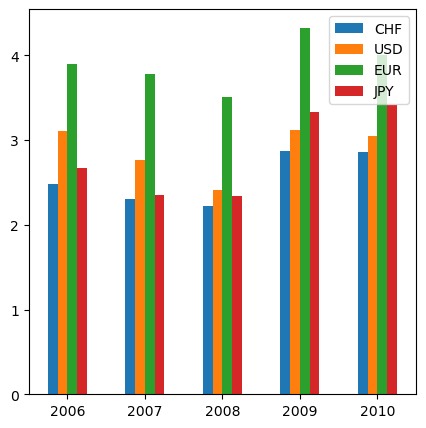

In [97]:
# rozwiązanie zadania
df = pd.read_excel(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\waluty1.xls")
print(df.head())

### Индексы на основе колоно ГОД, МЕСЯЦ, ДЕНЬ + убираем потом эти колонки
df.index = pd.to_datetime(df['rok'].map(str) + "-" + df['mies'].map(str) + "-" + df['dzien'].map(str))
df = df.drop(columns = ['rok', 'mies', 'dzien'])
###

### Группируем по годам и считааем среднее значение валют
df = df.groupby(df.index.to_period('Y')).mean()
print(df.head())
###

df.plot.bar(rot=0);

Słupki odpowiadające poszczególnym kategoriom mogą być także umieszczone jeden nad drugim.

          a         b         c         d
0  0.982473  0.180322  0.288625  0.801166
1  0.354993  0.258772  0.902274  0.143397
2  0.296028  0.751133  0.227798  0.085778
3  0.473929  0.540544  0.754516  0.011064
4  0.970760  0.670257  0.310001  0.539613


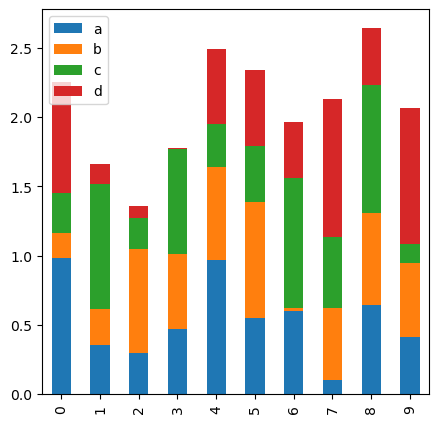

In [98]:
print(df2.head())
df2.plot.bar(stacked=True);

Wykres może być także odwrócony o 90 stopni - otrzymujemy wówczas wykres słupkowy.

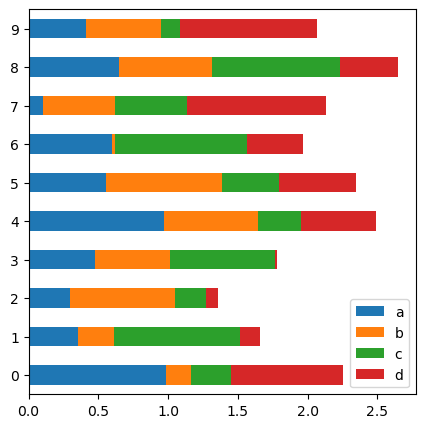

In [99]:
df2.plot.barh(stacked=True);

> **Zadanie** Wyświetl analogiczny wykres ale wartości posortowanych - najkrótszy słupek powinien znajdować na górze, a najdłuższy - na dole (wskazówka - stwórz nową kolumnę zawierającą sumę wartości, a następnie posortuj rosnąco względem tej kolumny).

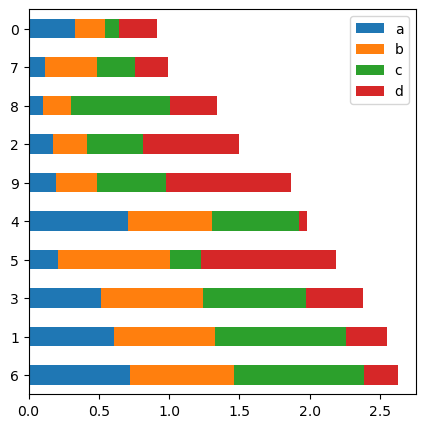

In [112]:
# rozwiązanie
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2['Suma'] = df2.sum(axis = 'columns')
df2 = df2.sort_values('Suma', ascending = False)
df2[['a', 'b', 'c', 'd']].plot.barh(stacked=True);

## 3 Statystyczne wykresy jednowymiarowe - histogramy i wykresy pudełkowe

**Histogram** jest wykresem częstości występowania poszczególnych wartości w zbiorze. W przypadku atrybutu ilościowego, liczby wystąpień liczy się w ustalonej liczbie zakresów. Dla większej liczby atrybutów na pojedynczym wykresie, poszczególne histogramy mogą zostać na siebie nałożone.

          a         b         c
0  0.363226  2.180905 -2.346484
1 -0.435428  0.401719 -0.186450
2  0.482613 -1.895021 -1.959510
3  1.666984 -0.150426 -1.586930
4  1.651528 -1.422448 -0.152839


<Axes: >

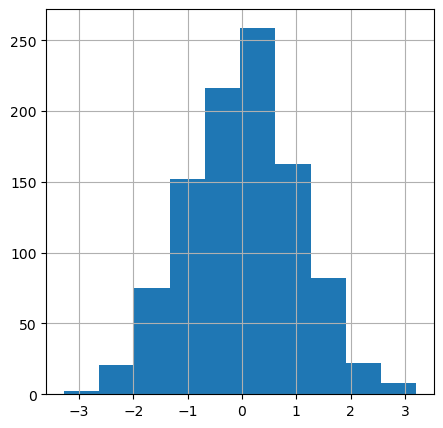

In [113]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
print(df4.head())
plt.figure();
#df4['a'].plot.hist()

### Горизонтальная - промежутки значений (например: от -3 до -2, от -2 до -1 и т.д.)
### Вертикальная - количество значений в столбике
df4['b'].hist()

Liczbę zakresów ustala się przy pomocy argumentu `bins`. Poniższy przykład pokazuje histogramy tego samego zbioru danych, ale dla różnych ilości przedziałów tj. z różną liczbą słupków, a co za tym idzie innym zakresem osi rzędnych.

<Axes: ylabel='Frequency'>

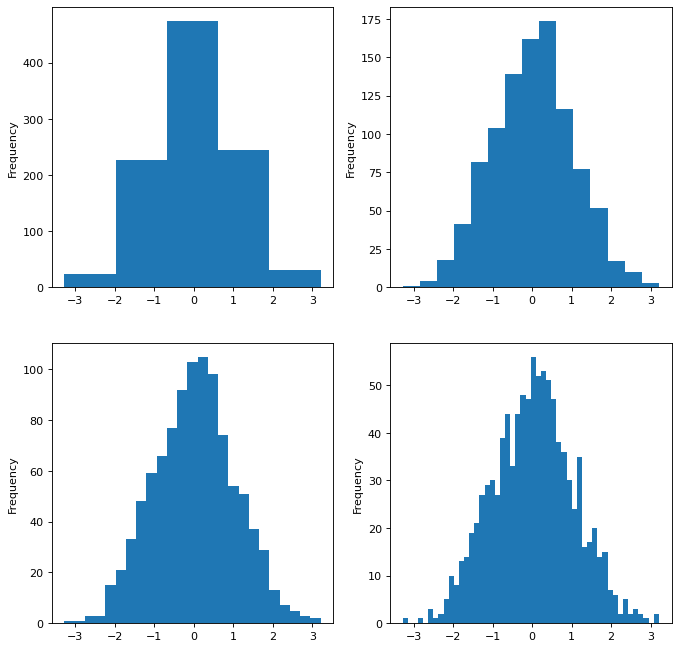

In [117]:
plt.figure(figsize=(10,10), dpi= 80)

### Так мы определяем положение графика в окне вывода
### 2,2,1 - 2 строки, 2 столбца, первая секция (лево-верх)
plt.subplot(2,2,1)
### Пять промежутков, bins = кол-во промежутков
df4['b'].plot.hist(bins=5)
###
###

plt.subplot(2,2,2)
df4['b'].plot.hist(bins=15)
plt.subplot(2,2,3)
df4['b'].plot.hist(bins=25)
plt.subplot(2,2,4)
df4['b'].plot.hist(bins=50)

Histogramy większej liczby atrybutów moga być wyświetlane jako odrębne wykresy.

          a         b         c
0  0.363226  2.180905 -2.346484
1 -0.435428  0.401719 -0.186450
2  0.482613 -1.895021 -1.959510
3  1.666984 -0.150426 -1.586930
4  1.651528 -1.422448 -0.152839


array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'c'}>, <Axes: >]], dtype=object)

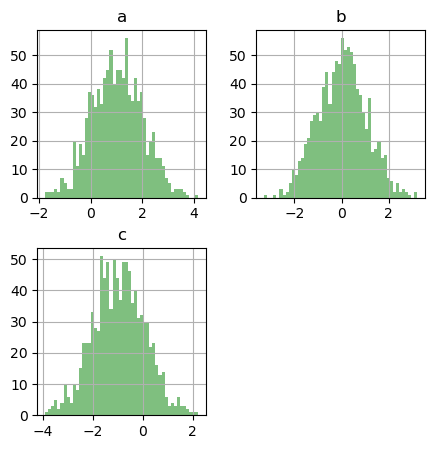

In [121]:
print(df4.head())

'''
!!! df.hist - создаёт отдельные гистограммы для каждого столбца и в разные окна
'''


df4.hist(color='g', alpha=0.5, bins=50)

Ale histogramy większej liczby atrybutów moga także zostać pokazane na pojedynczym wykresie.

          a         b         c
0  0.363226  2.180905 -2.346484
1 -0.435428  0.401719 -0.186450
2  0.482613 -1.895021 -1.959510
3  1.666984 -0.150426 -1.586930
4  1.651528 -1.422448 -0.152839


<Axes: ylabel='Frequency'>

<Figure size 500x500 with 0 Axes>

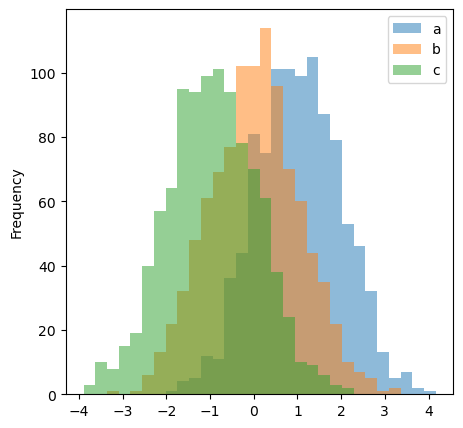

In [124]:
print(df4.head())
plt.figure();

'''
df4.plot.hist() - создаёт отдельную гистограмму для каждого столбца но пишет в один график
'''


df4.plot.hist(alpha=0.5, bins = 30)

Atrybut `stacked` umożliwia uzyskanie sumarycznego histogramu wszystkich atrybutów, z rozróżnieniem udziału każdego przy pomocy koloru.

          a         b         c
0  0.363226  2.180905 -2.346484
1 -0.435428  0.401719 -0.186450
2  0.482613 -1.895021 -1.959510
3  1.666984 -0.150426 -1.586930
4  1.651528 -1.422448 -0.152839


<Axes: ylabel='Frequency'>

<Figure size 500x500 with 0 Axes>

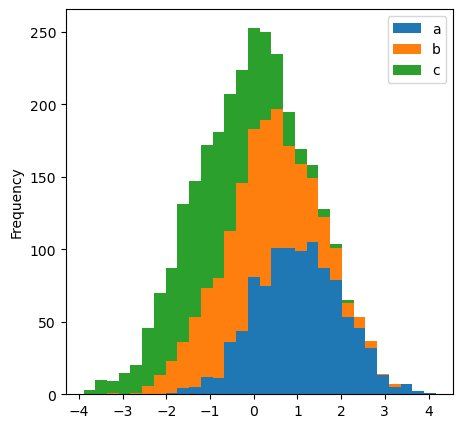

In [125]:
print(df4.head())
plt.figure();
df4.plot.hist(stacked=True, bins=30)

Histogram może zostać wyświetlony w formie obróconej o 90 stopni, może także zostac wyświetlony jako **histogram skumulowany**. 

          a         b         c
0  0.363226  2.180905 -2.346484
1 -0.435428  0.401719 -0.186450
2  0.482613 -1.895021 -1.959510
3  1.666984 -0.150426 -1.586930
4  1.651528 -1.422448 -0.152839


<Axes: xlabel='Frequency'>

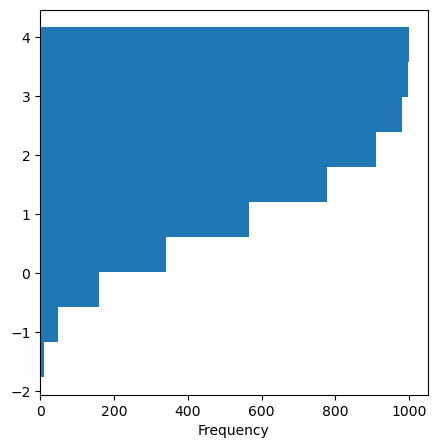

In [127]:
print(df4.head())
plt.figure();
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

Histogramy uwidaczniają zakresy zmienności atrybutów, co ma duże znaczenie w kontekście określania ich zmienności dla poszczególnych klas. 

   atrybut1  atrybut2    klasa
0        86        43  klasa 3
1        79        50  klasa 3
2        73        49  klasa 3
3        69        49  klasa 3
4        74        43  klasa 3
    atrybut1  atrybut2    klasa
75        14        22  klasa 2
76         7        28  klasa 2
77         8        22  klasa 2
78         6        16  klasa 2
79         4        22  klasa 2


<Axes: ylabel='Frequency'>

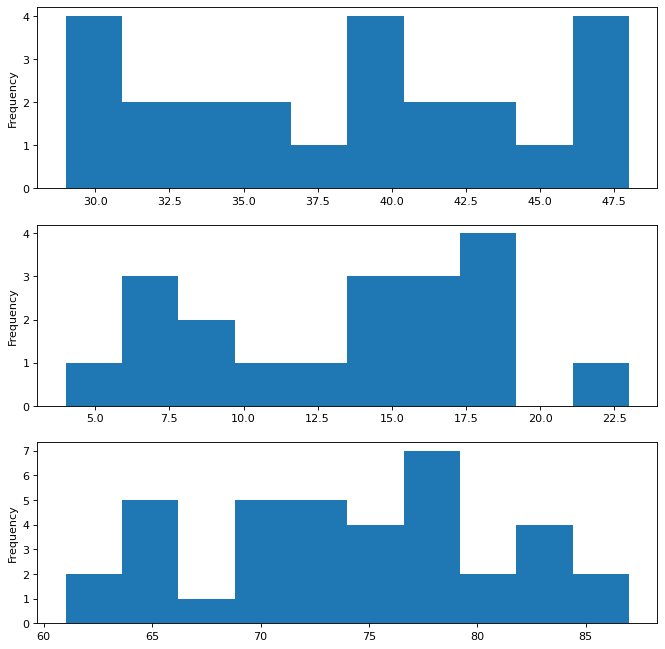

In [24]:
# wczytanie danych
d = pd.read_csv('dane1.csv')
print(d.head())
print(d.tail())

atr = 'atrybut1'
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3,1,1)
d.loc[d.klasa == 'klasa 1',atr].plot.hist()
plt.subplot(3,1,2)
d.loc[d.klasa == 'klasa 2',atr].plot.hist()
plt.subplot(3,1,3)
d.loc[d.klasa == 'klasa 3',atr].plot.hist()

Taka prezentacja histogramów klas nie daje czytelnego obrazu charakterystyk poszczególnych klas. Bardziej czytelny wykres uzyskujemy wyświetlając histogram bez podziału na klasy.

<Axes: xlabel='atrybut2', ylabel='Count'>

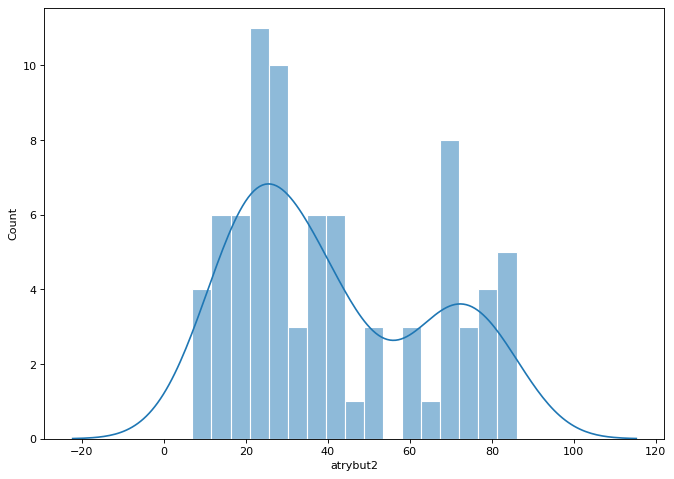

In [129]:
df = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\dane1.csv")
atr = 'atrybut2'
plt.figure(figsize=(10,7), dpi= 80)


'''
df.loc[:,atr]
Выбирает все строки и только столбец 'atrybut2'
Эквивалентно df['atrybut2']

bins=17
Разбивает данные на 17 интервалов (столбцов гистограммы)

edgecolor='white'
Белый цвет границ столбцов
Делает гистограмму более читаемой

kde=True
Добавляет кривую KDE (Kernel Density Estimate)
Это сглаженная оценка плотности распределения

kde_kws=dict(cut=3)
Параметры для KDE
cut=3 — обрезает KDE на 3 стандартных отклонения от данных
'''
sns.histplot(df.loc[:,atr], bins = 17, edgecolor='white', kde=True, kde_kws=dict(cut=3))



Wyraźnie większą czytelność uzyskujemy wyznaczając histogramy dla każdej klasy z osobna. 

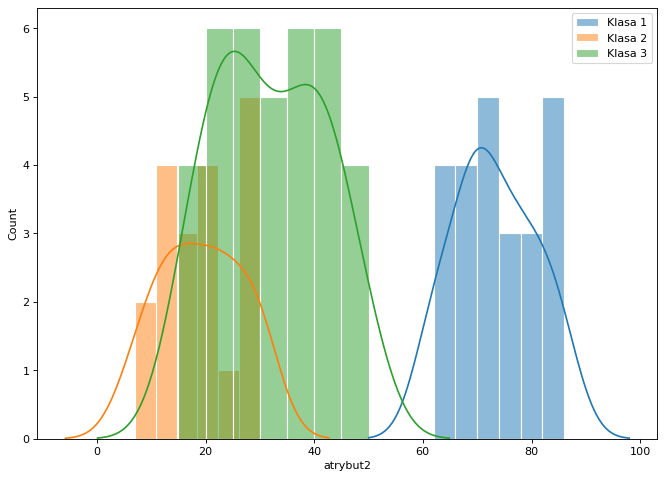

In [131]:
df = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\dane1.csv")
atr = 'atrybut2'
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(df.loc[df.klasa == 'klasa 1',atr], label="Klasa 1", edgecolor='white', kde=True,kde_kws=dict(cut=3))
sns.histplot(df.loc[df.klasa == 'klasa 2',atr], label="Klasa 2", edgecolor='white', kde=True,kde_kws=dict(cut=3))
sns.histplot(df.loc[df.klasa == 'klasa 3',atr], label="Klasa 3", edgecolor='white', kde=True,kde_kws=dict(cut=3))
plt.legend();

Chcąc pokazać zmienność dwóch atrybutów można wyświetlić dwa histogramy jeden pod drugim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   atrybut1  114 non-null    int64 
 1   atrybut2  114 non-null    int64 
 2   klasa     114 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.8+ KB
None

 klasa 1
        atrybut1   atrybut2
count  43.000000  43.000000
mean   45.720930  71.697674
std    15.189792  19.571037
min     1.000000  10.000000
25%    36.500000  68.500000
50%    46.000000  76.000000
75%    55.000000  83.000000
max    84.000000  93.000000

 klasa 2
        atrybut1   atrybut2
count  36.000000  36.000000
mean   22.388889  28.027778
std    16.735382  17.033557
min     6.000000   8.000000
25%    11.750000  15.000000
50%    20.000000  24.500000
75%    27.250000  35.250000
max    82.000000  76.000000

 klasa 3
        atrybut1   atrybut2
count  35.000000  35.000000
mean   75.314286  25.514286
std    12.349735  14.314475
min  

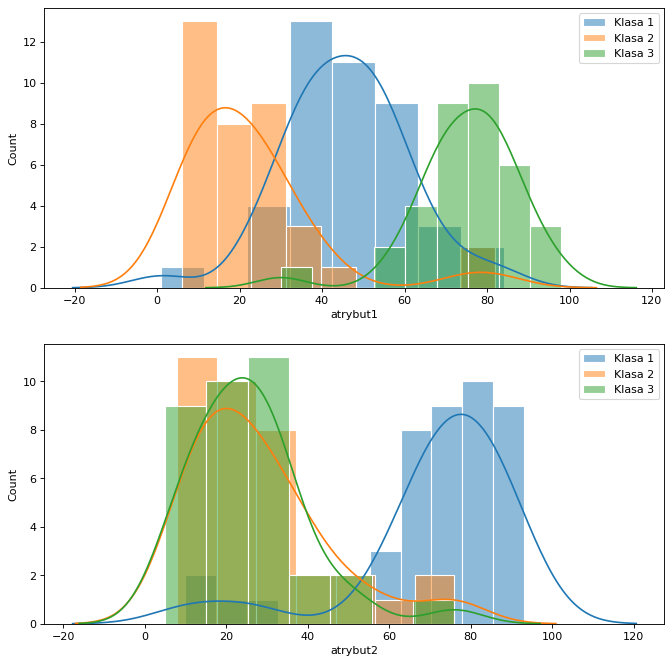

In [134]:
daneX = r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\dane2.csv"

def pokaz_jeden_atrybut(atr):

    ### Для каждой класы и выделенного атрибута выписываем на одном и том же графике гистограмму и линию сглаживания
    
    sns.histplot(df.loc[df.klasa == 'klasa 1',atr], label="Klasa 1", edgecolor='white', kde=True,kde_kws=dict(cut=3))
    sns.histplot(df.loc[df.klasa == 'klasa 2',atr], label="Klasa 2", edgecolor='white', kde=True,kde_kws=dict(cut=3))
    sns.histplot(df.loc[df.klasa == 'klasa 3',atr], label="Klasa 3", edgecolor='white', kde=True,kde_kws=dict(cut=3))
    plt.legend();
    
df = pd.read_csv(daneX)   
print(df.info())

### Итеруем по списку класс и вписываем описание по столбцам для сборки строк, в которых был нынешний класс
for kl in ['klasa 1','klasa 2','klasa 3']:
    print("\n",kl)
    print(df[df.klasa == str(kl)].describe())
###

### забиваем размер(в дюймах) и количесвто точек на дюйм
plt.figure(figsize=(10,10), dpi= 80)
###

### Положение и первый атрибут
plt.subplot(2,1,1)
atr = 'atrybut1'
pokaz_jeden_atrybut(atr)
###

### Положение и второй атрибут
plt.subplot(2,1,2)
atr = 'atrybut2'
pokaz_jeden_atrybut(atr)
###

> **Zadanie** Oceń na podstawie histogramów przydatność atrybutów do rozróżnienia klasy - który z dwóch atrybutów w większym stopniu determinuje klasę obiektu ? Dokonaj podobnej analizy dla pozostałych zbiorów 'daneX.csv' (X = {2,3,4,5,6,7}) - o czym świadczą różnice w histogramach tych zbiorów ?

> **Zadanie** Narysuj histogramy poszczególnych atrybutów zbioru danych `iris` z podziałem na klasy (setosa, virginica, versicolor) i wykonaj taką samą (jak w zadaniu powyżej) analizę.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
sepal_length
sepal_width
petal_length
petal_width


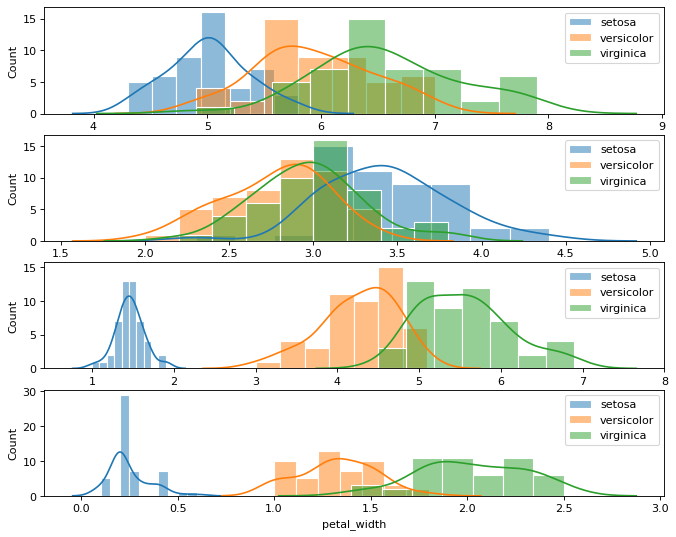

In [34]:
### Фнукция как прошлая по функционалу
def pokaz_jeden_atrybut_1(atr, species):
    print(atr)
    ### Для каждой класы и выделенного атрибута выписываем на одном и том же графике гистограмму и линию сглаживания
    ''''
    sns.histplot(iris.loc[iris.species == species[0],atr], label=species[0], edgecolor='white', kde=True,kde_kws=dict(cut=3))
    sns.histplot(iris.loc[iris.species == species[1],atr], label=species[1], edgecolor='white', kde=True,kde_kws=dict(cut=3))
    sns.histplot(iris.loc[iris.species == species[2],atr], label=species[2], edgecolor='white', kde=True,kde_kws=dict(cut=3))
    '''
    for i in range(len(species)):
        sns.histplot(iris.loc[iris.species == species[i],atr], label=species[i], edgecolor='white', kde=True,kde_kws=dict(cut=3))
    plt.legend();


# wczytanie danych
iris = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\iris.csv", usecols = range(1,6))
print(iris.head())
# rozwiązanie

atrybuty = list(iris.columns)

###species = list(iris.iloc[:,-1].unique())
species = list(iris['species'].unique())
###

a = 0
len_atr = len(atrybuty)

### забиваем размер(в дюймах) и количесвто точек на дюйм
plt.figure(figsize=(10,10), dpi= 80)
###

### Столько артрибутов, сколько нужно(высота, ширина) Но без последнего(вид)
for i in range(len_atr - 1):
    a +=1
    plt.subplot(len_atr,1,a)
    pokaz_jeden_atrybut_1(atrybuty[i], species)
    

> **Zadanie** Napisz funkcję wyświetlającą statystyki opisowe klas oraz histogramy atrybutów z podziałem na klasy dla DOWOLNEJ ramki danych o atrybutach ilościowych (dowolna liczba/nazwy klas, dowolna liczba/nazwy atrybutów).

Histogram jest wykorzystywane także do określania własności obrazu cyfrowego.

Text(0.5, 1.0, 'histogram')

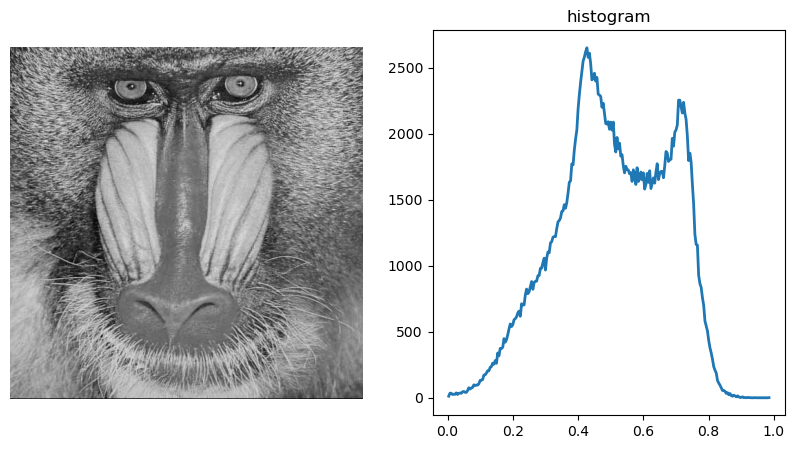

In [35]:
obraz = rgb2gray(io.imread(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\baboon.jpg"))

hist, hist_centers = histogram(obraz)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(obraz, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram')

W przypadku obrazu kolorowego najczęściej wyznaczane są histogramy poszczególnych składowych. 

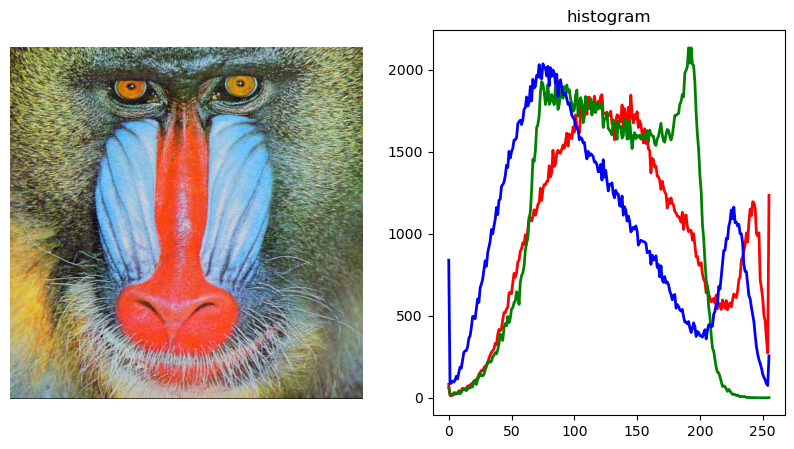

In [37]:
obraz = io.imread(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\baboon.jpg")
color = ('r','g','b')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(obraz, cmap=plt.cm.gray)
axes[0].axis('off')
for i,col in enumerate(color):
    hist, hist_centers = histogram(obraz[:,:,i])
    axes[1].plot(hist_centers, hist, lw=2, color = col)
    axes[1].set_title('histogram')
plt.show()

> **Zadanie** Wybierz dowolne, wybrane przez siebie zdjęcia, wykonane samodzielnie lub jakiekolwiek inne. Wczytaj je, wyświetl i obejrzyj histogram obrazu. Jakie wnioski odnoszące się do obrazu można wyciągnąć obserwując jego histogram ?

In [42]:
# miejsce na kod rozwiązania


**Wykresy pudełkowe** umożliwiają wyświetlanie zakresów zmienności atrybutów, pokazując podstawowe miary pozycyjne (kwartyle).

<Axes: xlabel='klasa', ylabel='atrybut2'>

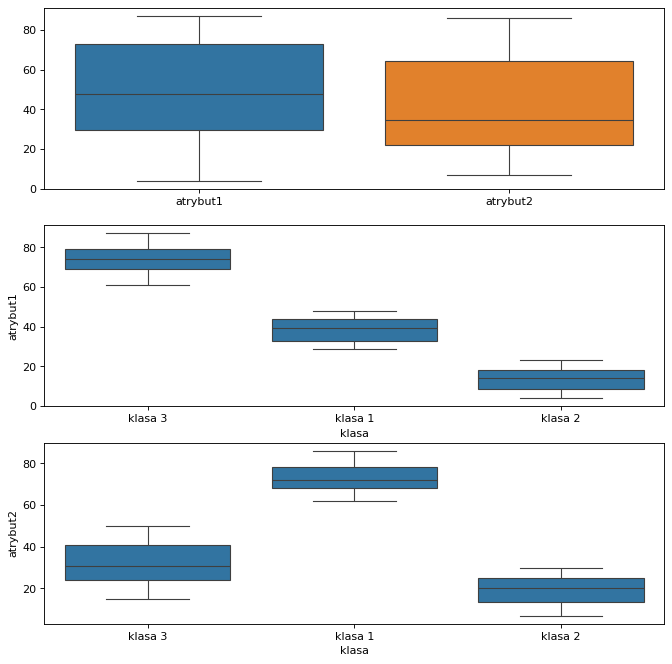

In [38]:
df = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\dane1.csv")
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3,1,1)
sns.boxplot(data=df)
plt.subplot(3,1,2)
sns.boxplot(x="klasa", y="atrybut1", data=df)
plt.subplot(3,1,3)
sns.boxplot(x="klasa", y="atrybut2", data=df)

> **Zadanie** Wyświetl wykresy pudełkowe dla dla drugiego atrybutu i dla kolejnych zbiorów `dane2`,...,`dane11`. Jakie wnioski można wyciągnąć z tych wykresów ?

Ciekawą kombinacją histogramu i wykresu pudełkowego jest tzw. **wykres skrzypcowy**, pokazujący jednocześnie dystrybucję (histogram) oraz miary kwartylowe.

<Axes: xlabel='klasa', ylabel='atrybut2'>

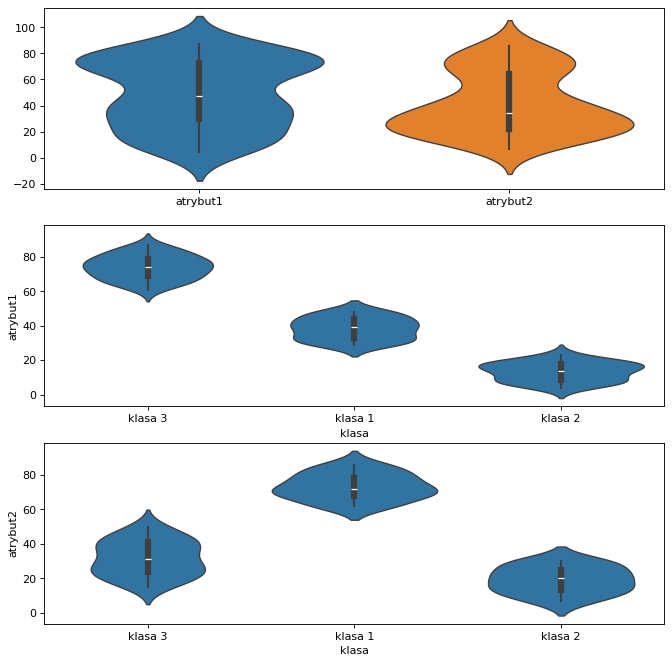

In [39]:
df = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\dane1.csv")
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3,1,1)
sns.violinplot(data=df)
plt.subplot(3,1,2)
sns.violinplot(x="klasa", y="atrybut1", data=df)
plt.subplot(3,1,3)
sns.violinplot(x="klasa", y="atrybut2", data=df)

Inny wariant tego wykresu pokazuje poszczególne punkty danych.

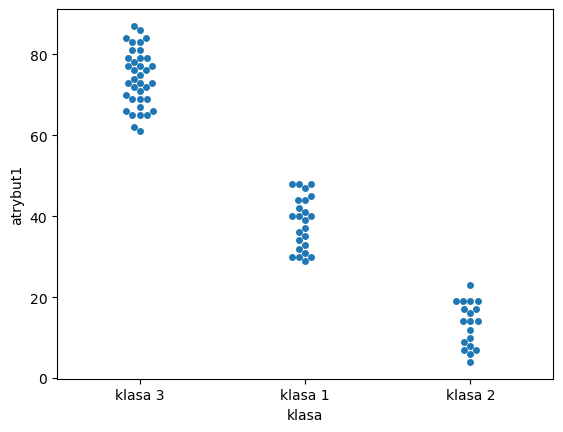

In [40]:
sns.swarmplot(x="klasa", y="atrybut1", data=df)
plt.show()

> **Zadanie** Obejrzyj zbiór `iris` korzystając z wykresów pudełkowego i skrzypcowego. Wyciągnij wnioski.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
wszystko


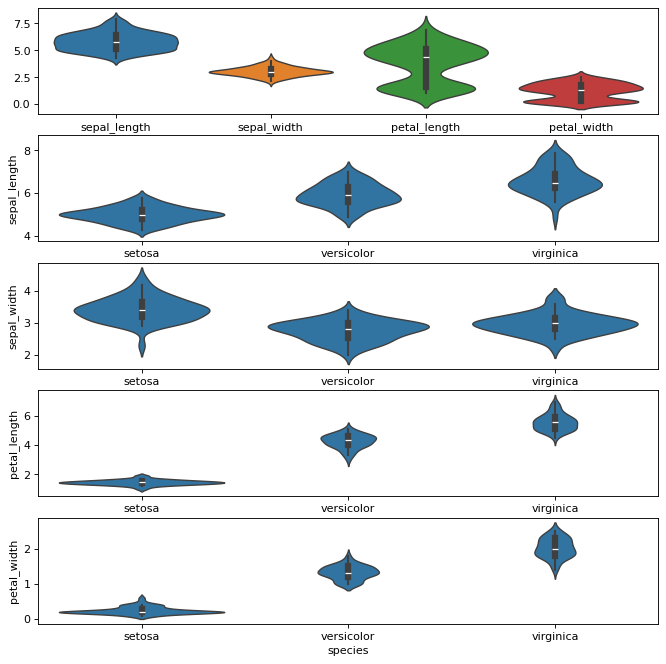

In [49]:
# rozwiązanie zadania



# wczytanie danych
iris = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\iris.csv", usecols = range(1,6))
print(iris.head())
# rozwiązanie

atrybuty = list(iris.columns)
length = len(atrybuty)
a = 1

plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(length,1,a)
print('wszystko')
sns.violinplot(data = iris)



for i in range(length - 1):
    a += 1
    plt.subplot(length,1,a)
    sns.violinplot(x=atrybuty[-1], y = atrybuty[i], data = iris)


## 4 Wykresy statystyczne wielowymiarowe - wykresy punktowe

Najpopularniejszym wykresem pozwalającym na obserwację większej liczby atrybutów, w tym nie tylko ich zmienności, ale także i wzajemnych zależności jest **wykres punktowy** zwany także wykresem rozrzutu. Dwuwymiarowy wykres punktowy prezentuje dwa atrybuty danych.

   atrybut1  atrybut2    klasa
0        66        76  klasa 3
1        30         5  klasa 3
2        77        76  klasa 1
3        25        89  klasa 1
4        33        92  klasa 1
     atrybut1  atrybut2    klasa
109         7        26  klasa 2
110         8        22  klasa 2
111        11        11  klasa 2
112         6        15  klasa 2
113         6        10  klasa 2


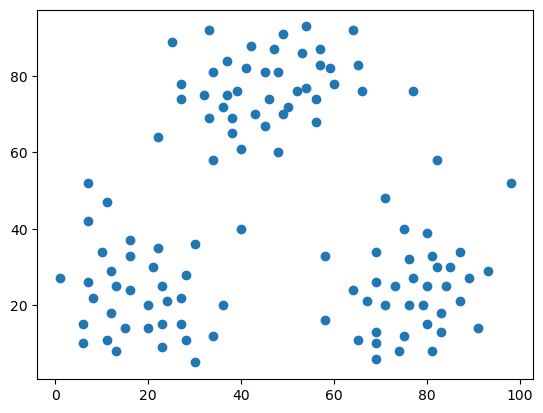

In [55]:
# wczytanie danych
d = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\dane2.csv")
print(d.head())
print(d.tail())

'''
Параметр за параметром:

'atrybut1' — название столбца для оси X

'atrybut2' — название столбца для оси Y

data=d — указываем, откуда брать данные (DataFrame d)

linestyle='none' — НЕ соединять точки линиями

marker='o' — рисовать точки в виде кружков (○)
'''
plt.plot( 'atrybut1', 'atrybut2', data=d, linestyle='none', marker='o')
plt.show()

Wiele spośród wykresów można wyświetlić w wykorzystaniem różnych pakietów. Następny przykład pokazuje ten sam wykres uzyskany przy pomocy funkcji z pakietu 'seaborn'.

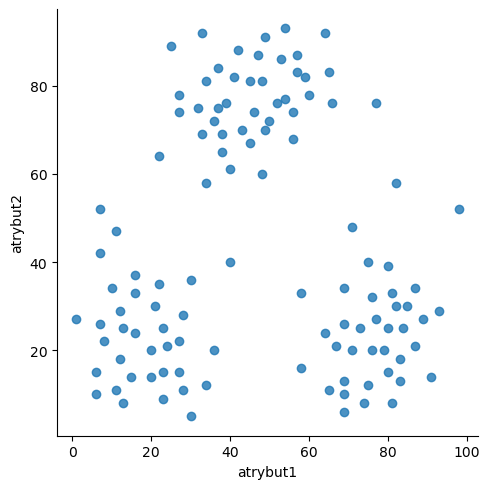

In [58]:
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, legend=False)

Jeśli obiekty są przyporządkowane do pewnych klas (a tak jest w przypadku zbioru danych `dane1.csv`), to przynależność tam może zostać oznaczona odpowiednim kolorem.

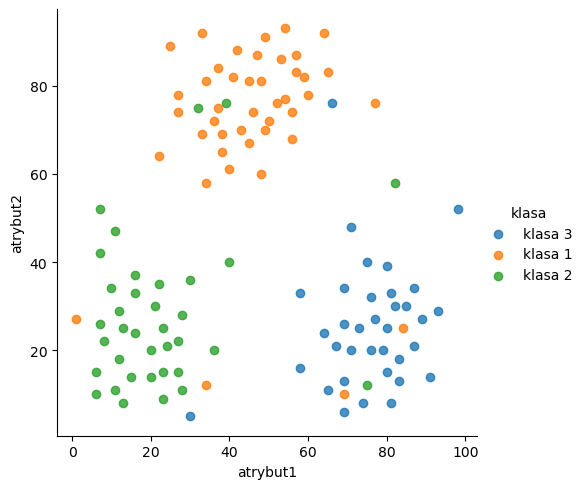

In [59]:
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=True)

> **Zadanie** Obejrzyj wykresy punktowe zbiorów `dane1.csv` ...`dane11.csv`. Czym różnią się te zbiory ? 

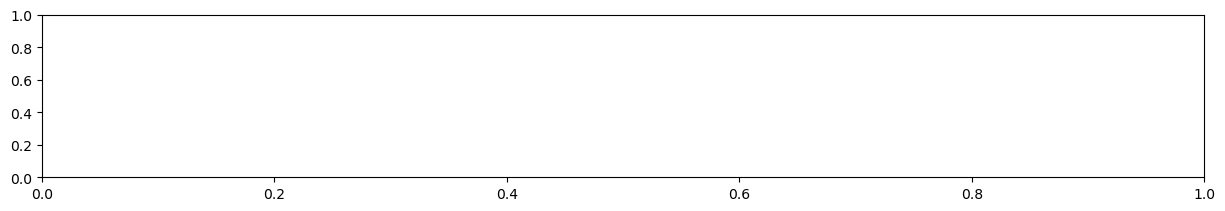

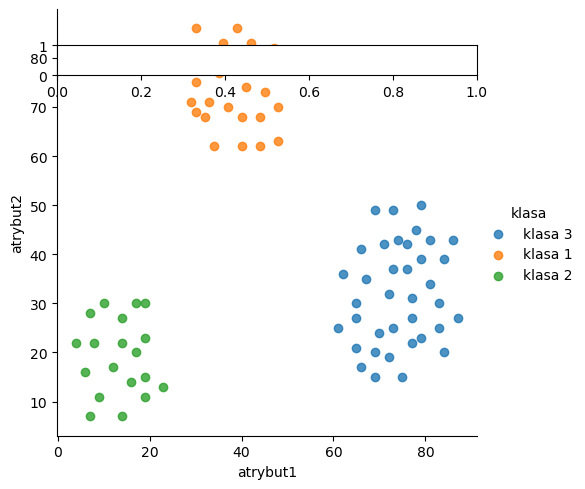

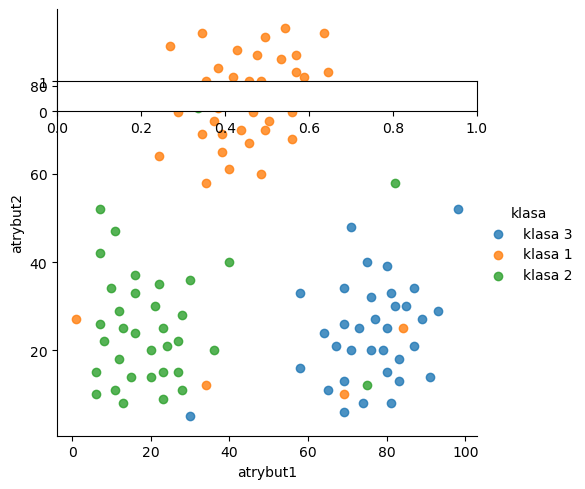

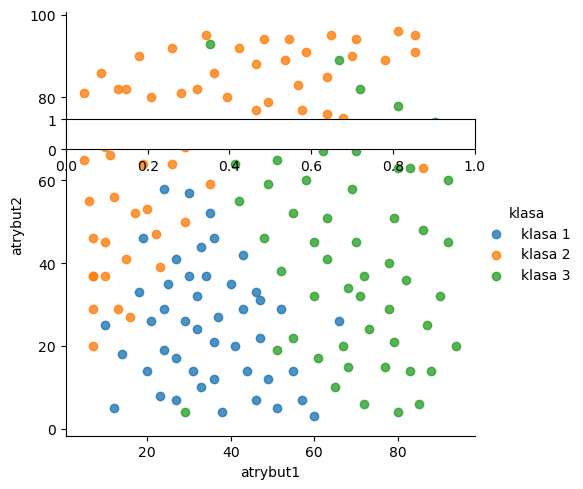

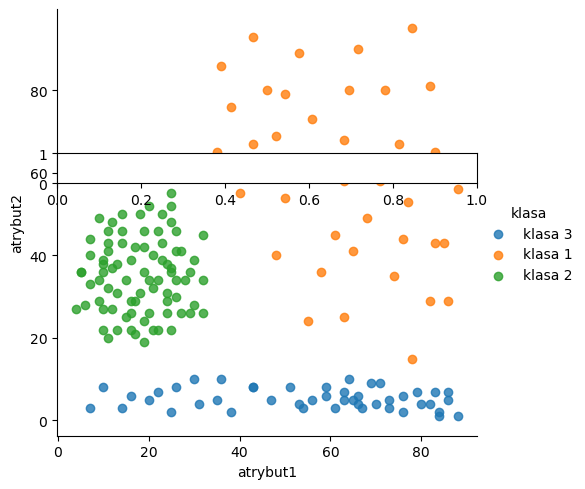

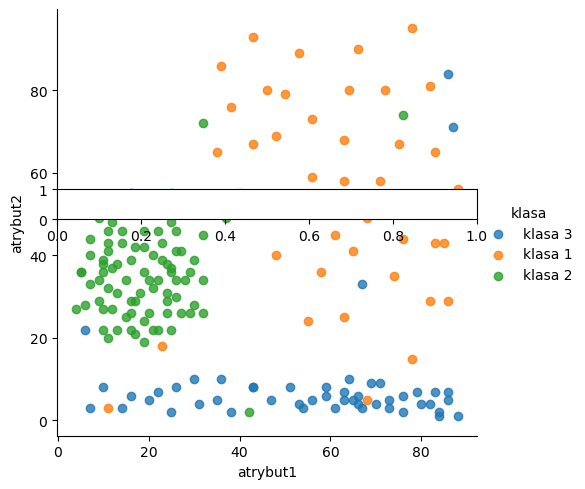

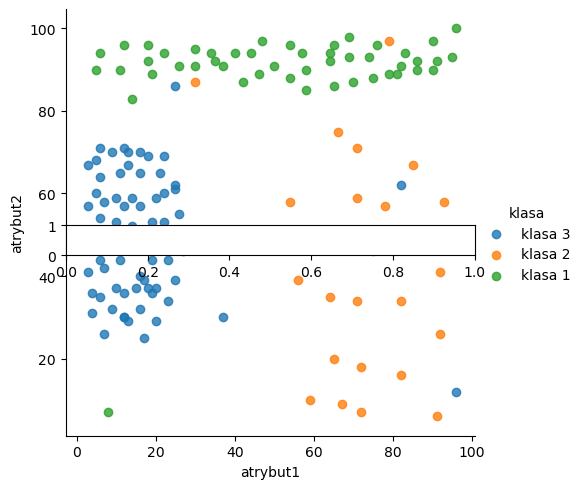

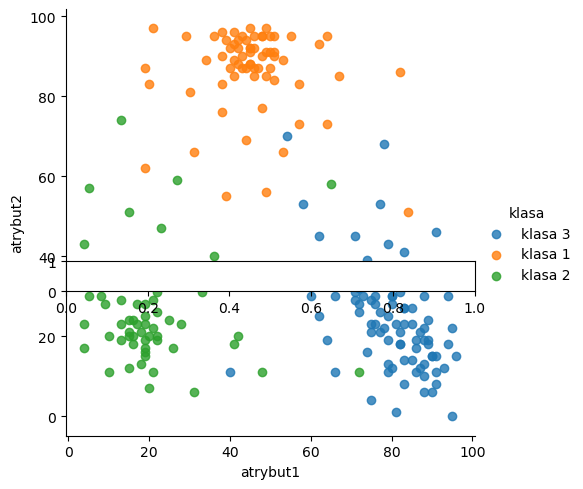

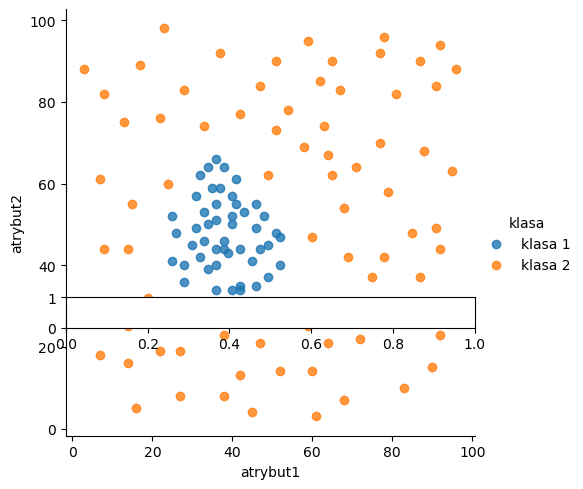

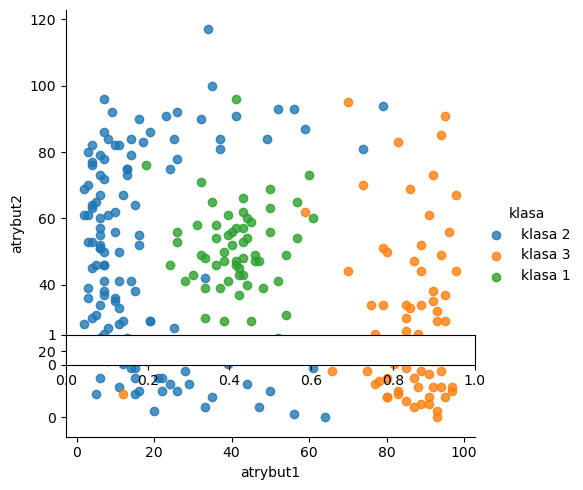

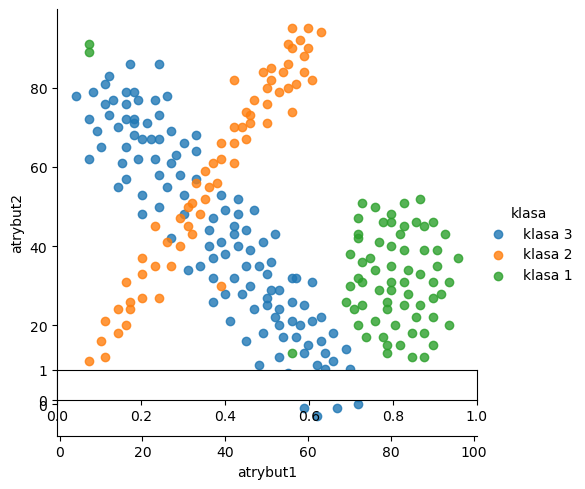

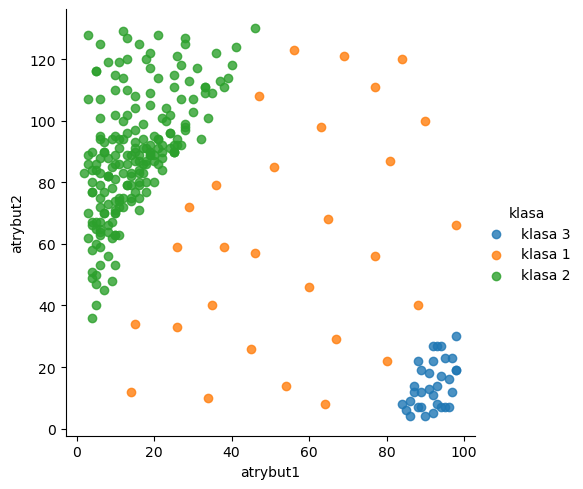

In [62]:
# miejsce na kod
plt.figure(figsize=(15, 30))
for i in range(1, 12):
    d = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\dane" + str(i) + ".csv")
    plt.subplot(12,1,i)
    sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=True)

W przypadku większej liczby atrybutów, wyznacza się macierz wykresów punktowych, w której znajdują się wykresy punktowe par atrybutów.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


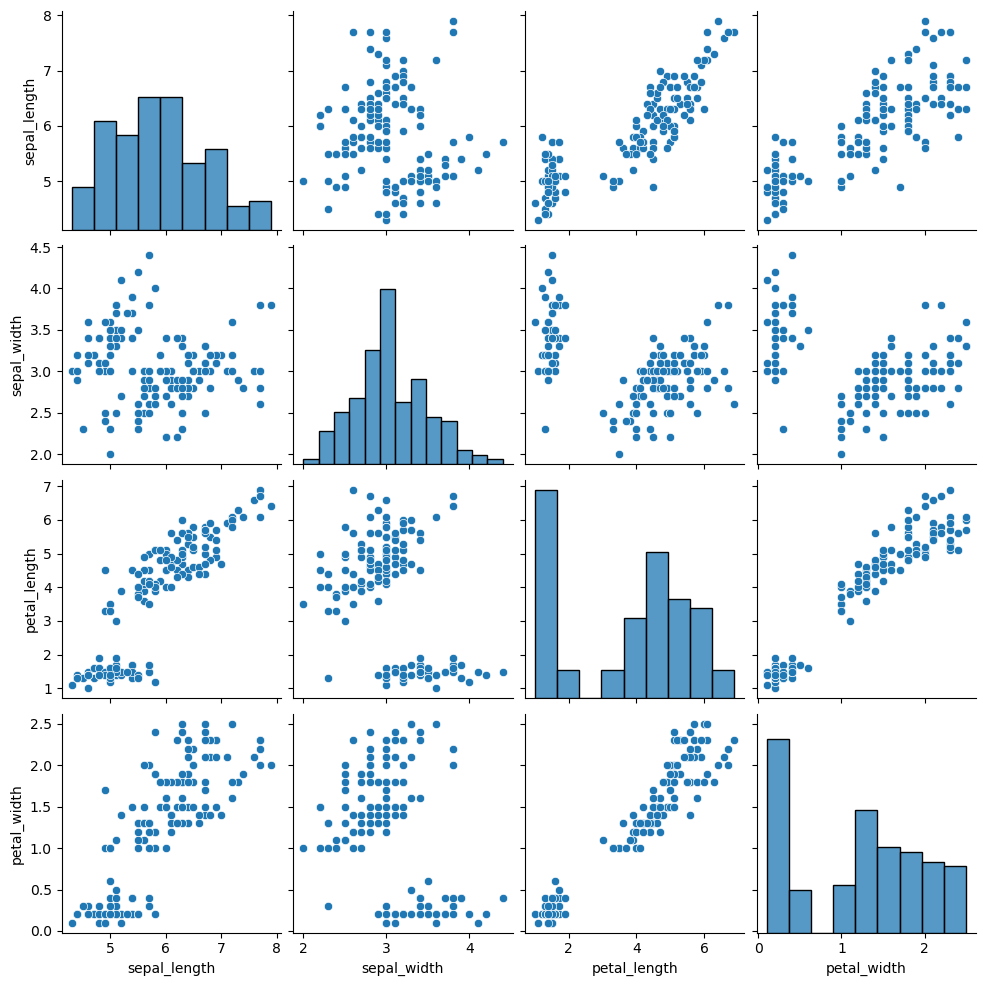

In [64]:
i = pd.read_csv(r"C:\Users\seraf\Downloads\PRiAD 21_22 (1)\iris.csv", usecols = range(1,6))
print(i.head())

'''
pairlot:
На диагонали: Гистограммы каждого признака
Вне диагонали: Scatter plots всех пар признаков - все пары признаков симметричны по диагонали от нуля
'''
sns.pairplot(i, kind="scatter")
plt.show()

Dużo więcej informacji można uzyskać wyświetlając wersję z oznaczonymi klasami

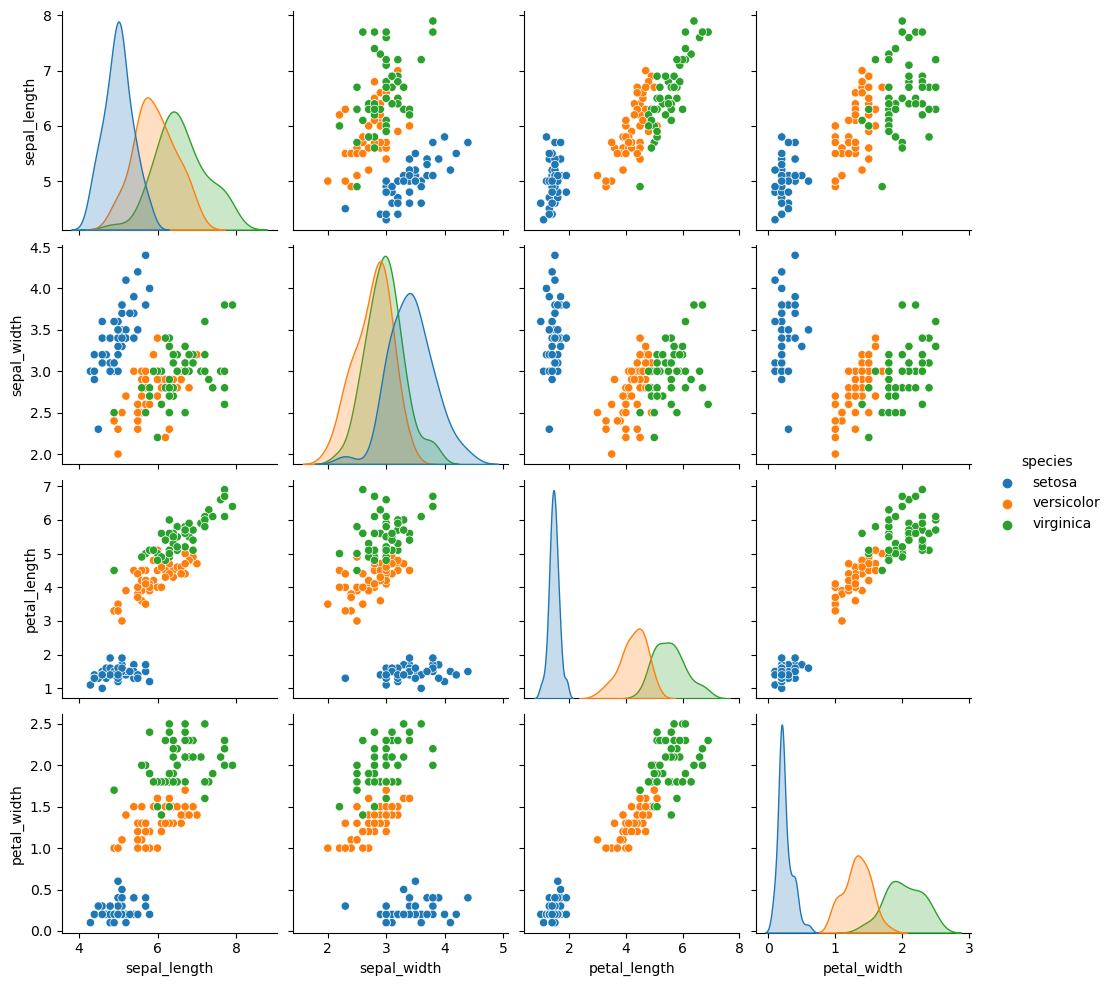

In [52]:
i = pd.read_csv('iris.csv', usecols = range(1,6))
sns.pairplot(i, kind="scatter", hue = "species")
plt.show()

> **Zadanie** Jak sądzisz, które cechy botanicy biorą pod uwagę rozróżnając poszczególne odmiany kwiatów irysa ?

## 5. Na zakończenie

Wyznaczanie miar danych i wizualizacja danych są zadaniami uzupełniającymi się. Dla pełnego poznania zbioru danych należy zarówno wyznaczyć podstawowe statystyki opisowe (miary danych) jak też i przedstawić je w postaci graficznej, a następnie ją przeanalizować. Wykonanie tylko jednej z nich może prowadzić do nieoczekiwanych pomyłek. Przykładem na to jest tzw. [kwartet Anscombe'a](https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a). 

In [53]:
# Wczytanie danych
d = pd.read_excel('anscombe.xlsx',header = 2,usecols = range(1,10), index_col = 0)
print(d)

      x1     y1  x2    y2  x3     y3  x4     y4
Obs.                                           
1     10   8.04  10  9.14  10   7.46   8   6.58
2      8   6.95   8  8.14   8   6.77   8   5.76
3     13   7.58  13  8.74  13  12.74   8   7.71
4      9   8.81   9  8.77   9   7.11   8   8.84
5     11   8.33  11  9.26  11   7.81   8   8.47
6     14   9.96  14  8.10  14   8.84   8   7.04
7      6   7.24   6  6.13   6   6.08   8   5.25
8      4   4.26   4  3.10   4   5.39  19  12.50
9     12  10.84  12  9.13  12   8.15   8   5.56
10     7   4.82   7  7.26   7   6.42   8   7.91
11     5   5.68   5  4.74   5   5.73   8   6.89


               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
          x         y
x  1.000000  0.816421
y  0.816421  1.000000


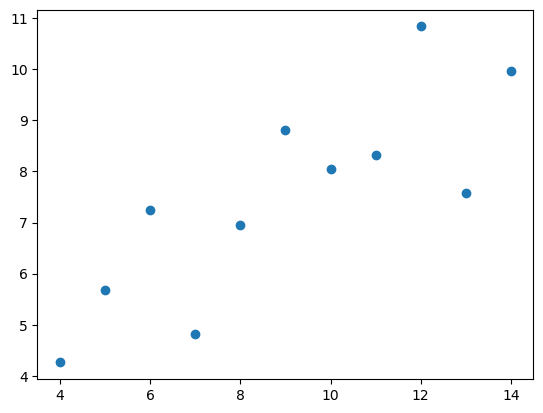

In [54]:
# Zestaw 1
dd = d[['x1','y1']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())

'''
plt.scatter(dd.x, dd.y) — строит точечную диаграмму (scatter plot) с данными из DataFrame dd.x - по горизонтали, dd.y - по вертикали
'''
plt.scatter(dd.x,dd.y)

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
          x         y
x  1.000000  0.816237
y  0.816237  1.000000


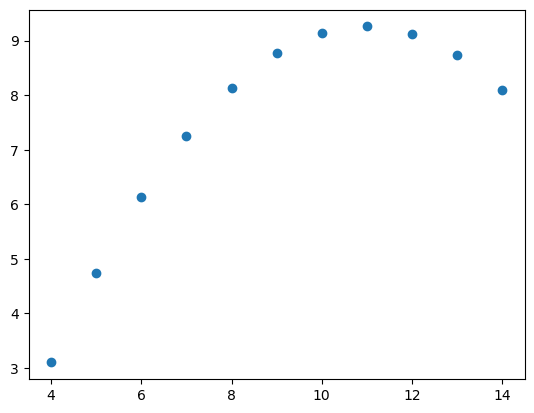

In [55]:
# Zestaw 2
dd = d[['x2','y2']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())
plt.scatter(dd.x,dd.y)

               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
          x         y
x  1.000000  0.816287
y  0.816287  1.000000


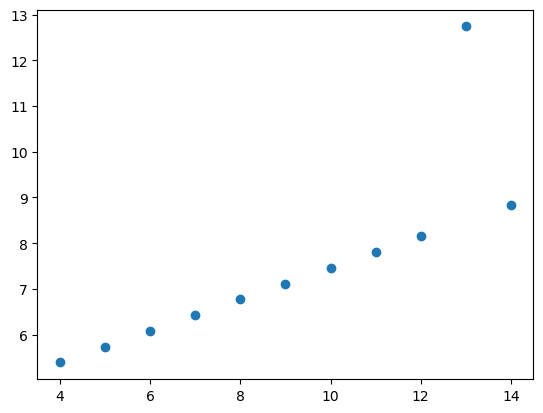

In [56]:
# Zestaw 3
dd = d[['x3','y3']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())
plt.scatter(dd.x,dd.y)

               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.000000   8.190000
max    19.000000  12.500000
          x         y
x  1.000000  0.816521
y  0.816521  1.000000


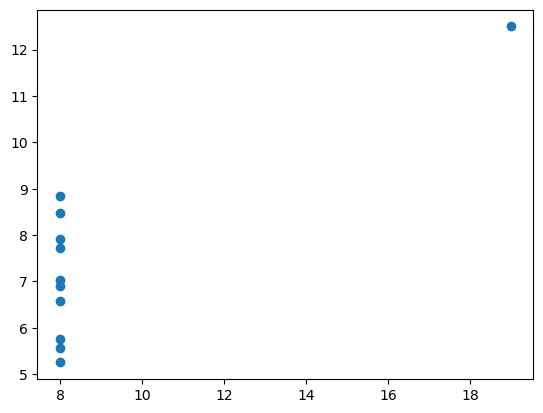

In [57]:
# Zestaw 4
dd = d[['x4','y4']]
dd.columns = ['x','y']
print(dd.describe())
print(dd.corr())
plt.scatter(dd.x,dd.y)

> **Pytanie** Co pokazuje kwartet Anscombe'a i jakie wnioski można z niego wyciągnąć ? 

## Dla dociekliwych

* [Wykresy w Pythonie](https://python-graph-gallery.com/)
* [Histogramy](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
* [Histogramy obrazów](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)
* [Wykresy pudełkowe](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)
* [Kwartet Anscombe'a](https://vknight.org/unpeudemath/mathematics/2016/10/29/anscombes-quartet-variability-and-ciw.html)

---
---
Historia zmian:
* wersja pierwotna r.akad 18/19: 03.2019 (MI)
* wersja r.akad 19/20: 26.03.2020 (MI)
* wersja r.akad 19/20: 27.03.2020 (GS), 1.04.2020 (MI)
* wersja r.akad 20/21: 23.10.2020 (MI)
* wersja r.akad 24/25: 4.11.2024 (MI)